In [3]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [4]:
num_layers = 2
num_units = 128
is_use_dropout = True
dropout_str = 'on' if is_use_dropout else 'off'
dirname = 'results/'
filename = 'dropout={}_units={}_layers={}.json'.format(dropout_str, num_units, num_layers)

In [5]:
data = []

## - layers, units, dropout
- 2, 128, off
- 2, 128, on
- 2, 1024, off
- 2, 1024, on
- 4, 128, off
- 4, 128, on
- 4, 512, off
- 4, 512, on
- 8, 128, off
- 8, 128, on
- 8, 256, off
- 8, 256, on

In [22]:
dirname = 'results/'
filename = 'dropout={}_units={}_layers={}.json'.format('on', 256, 8)
f = open(dirname + filename, 'r')
data.append(f)

In [27]:
len(data)

12

In [28]:
def convert_np_array_file(f):
    return np.array(json.load(f))

In [30]:
data_2_128_off = convert_np_array_file(data[0])
data_2_128_on = convert_np_array_file(data[1])
data_2_1024_off = convert_np_array_file(data[2])
data_2_1024_on = convert_np_array_file(data[3])
data_4_128_off = convert_np_array_file(data[4])
data_4_128_on = convert_np_array_file(data[5])
data_4_512_off = convert_np_array_file(data[6])
data_4_512_on = convert_np_array_file(data[7])
data_8_128_off = convert_np_array_file(data[8])
data_8_128_on = convert_np_array_file(data[9])
data_8_256_off = convert_np_array_file(data[10])
data_8_256_on = convert_np_array_file(data[11])

In [31]:
data_2_128_on

array([[  1.52619616e+09,   5.00000000e+01,   8.17399979e-01],
       [  1.52619616e+09,   6.00000000e+01,   8.27799976e-01],
       [  1.52619616e+09,   1.00000000e+02,   8.70899975e-01],
       ..., 
       [  1.52619623e+09,   2.49600000e+04,   9.77800012e-01],
       [  1.52619623e+09,   2.49800000e+04,   9.77999985e-01],
       [  1.52619623e+09,   2.49900000e+04,   9.79200006e-01]])

In [32]:
def running_avg(data: np.array, running_num=10) -> np.array:
    b = np.ones(running_num)/running_num
    return np.convolve(data, b, mode='same')

In [48]:
def print_accuracy(off_data, on_data):
    last_index = len(off_data)-1
    print('accuracy for dropout off: ', off_data[last_index, 2])
    print('accuracy for dropout on: ', on_data[last_index, 2])

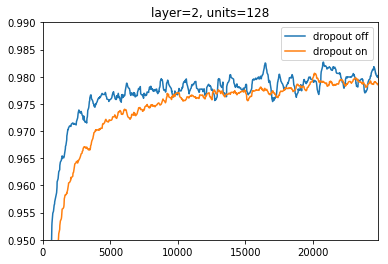

accuracy for dropout off:  0.980899989605
accuracy for dropout on:  0.979200005531


In [49]:
plt.title('layer=2, units=128')
plt.plot(data_2_128_off[:,1], running_avg(data_2_128_off[:,2]), label='dropout off')
plt.plot(data_2_128_on[:,1], running_avg(data_2_128_on[:,2]), label='dropout on')
plt.legend()
plt.ylim(0.95, 0.99)
plt.xlim(0, 24800)
plt.show()
print_accuracy(data_2_128_off, data_2_128_on)

accuracy for dropout off:  0.979799985886
accuracy for dropout on:  0.981500029564


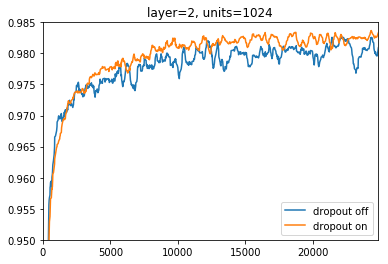

In [50]:
plt.title('layer=2, units=1024')
plt.plot(data_2_1024_off[:,1], running_avg(data_2_1024_off[:,2]), label='dropout off')
plt.plot(data_2_1024_on[:,1], running_avg(data_2_1024_on[:,2]), label='dropout on')
plt.ylim(0.95, 0.985)
plt.xlim(0, 24800)
plt.legend()
print_accuracy(data_2_1024_off, data_2_1024_on)

accuracy for dropout off:  0.980799973011
accuracy for dropout on:  0.97879999876


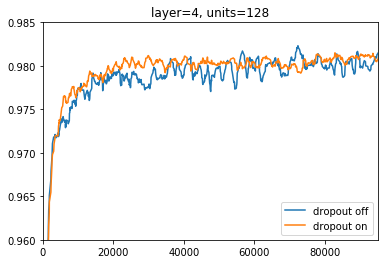

In [51]:
plt.title('layer=4, units=128')
plt.plot(data_4_128_off[:,1], running_avg(data_4_128_off[:,2]), label='dropout off')
plt.plot(data_4_128_on[:,1], running_avg(data_4_128_on[:,2]), label='dropout on')
plt.ylim(0.96, 0.985)
plt.xlim(0, 95000)
plt.legend()
print_accuracy(data_4_128_off, data_4_128_on)

accuracy for dropout off:  0.980599999428
accuracy for dropout on:  0.983900010586


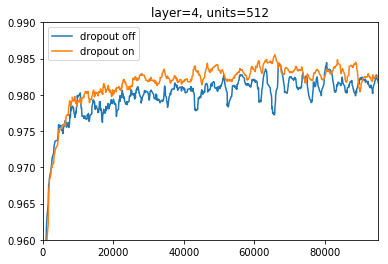

In [52]:
plt.title('layer=4, units=512')
plt.plot(data_4_512_off[:,1], running_avg(data_4_512_off[:,2]), label='dropout off')
plt.plot(data_4_512_on[:,1], running_avg(data_4_512_on[:,2]), label='dropout on')
plt.ylim(0.96, 0.99)
plt.xlim(0, 95000)
plt.legend()
print_accuracy(data_4_512_off, data_4_512_on)

accuracy for dropout off:  0.980300009251
accuracy for dropout on:  0.981299996376


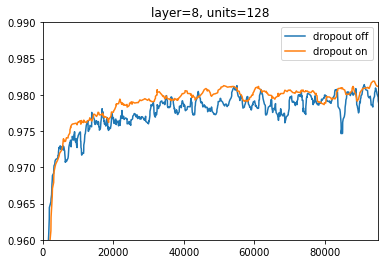

In [53]:
plt.title('layer=8, units=128')
plt.plot(data_8_128_off[:,1], running_avg(data_8_128_off[:,2]), label='dropout off')
plt.plot(data_8_128_on[:,1], running_avg(data_8_128_on[:,2]), label='dropout on')
plt.ylim(0.96, 0.99)
plt.xlim(0, 95000)
plt.legend()
print_accuracy(data_8_128_off, data_8_128_on)

accuracy for dropout off:  0.978299975395
accuracy for dropout on:  0.981000006199


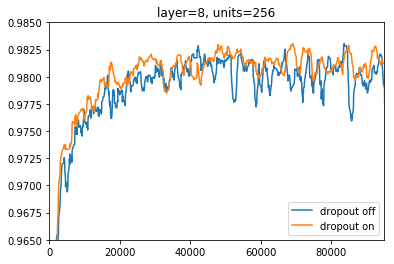

In [54]:
plt.title('layer=8, units=256')
plt.plot(data_8_256_off[:,1], running_avg(data_8_256_off[:,2]), label='dropout off')
plt.plot(data_8_256_on[:,1], running_avg(data_8_256_on[:,2]), label='dropout on')
plt.ylim(0.965,0.985)
plt.xlim(0,95000)
plt.legend()
print_accuracy(data_8_256_off, data_8_256_on)